## Task -2 TECHNOHACKS

## Employee turnover prediction

#### By Anchal Kapoor

### Problem Statement

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’, using this dataset of employee information and build a model that can predict which employees are most likely to leave the company.

Columns in the dataset are as below:

* Age
* Attrition
* BusinessTravel
* DailyRate
* Department
* DistanceFromHome
* Education
* EducationField
* EmployeeCount
* EmployeeNumber
* EnvironmentSatisfaction
* Gender
* HourlyRate
* JobInvolvement
* JobLevel
* JobRole
* JobSatisfaction
* MaritalStatus
* MonthlyIncome
* MonthlyRate
* NumCompaniesWorked
* Over18
* OverTime
* PercentSalaryHike
* PerformanceRating
* RelationshipSatisfaction
* StandardHours
* StockOptionLevel
* TotalWorkingYears
* TrainingTimesLastYear
* WorkLifeBalance
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager


### Import the libraries......

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Load the Dataset....

In [2]:
data= pd.read_csv('Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
print('Rows:',data.shape[0])
print('Columns:', data.shape[1])

Rows: 1470
Columns: 35


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Univariate and Bivariate Analysis

##### Univariate Analysis.....

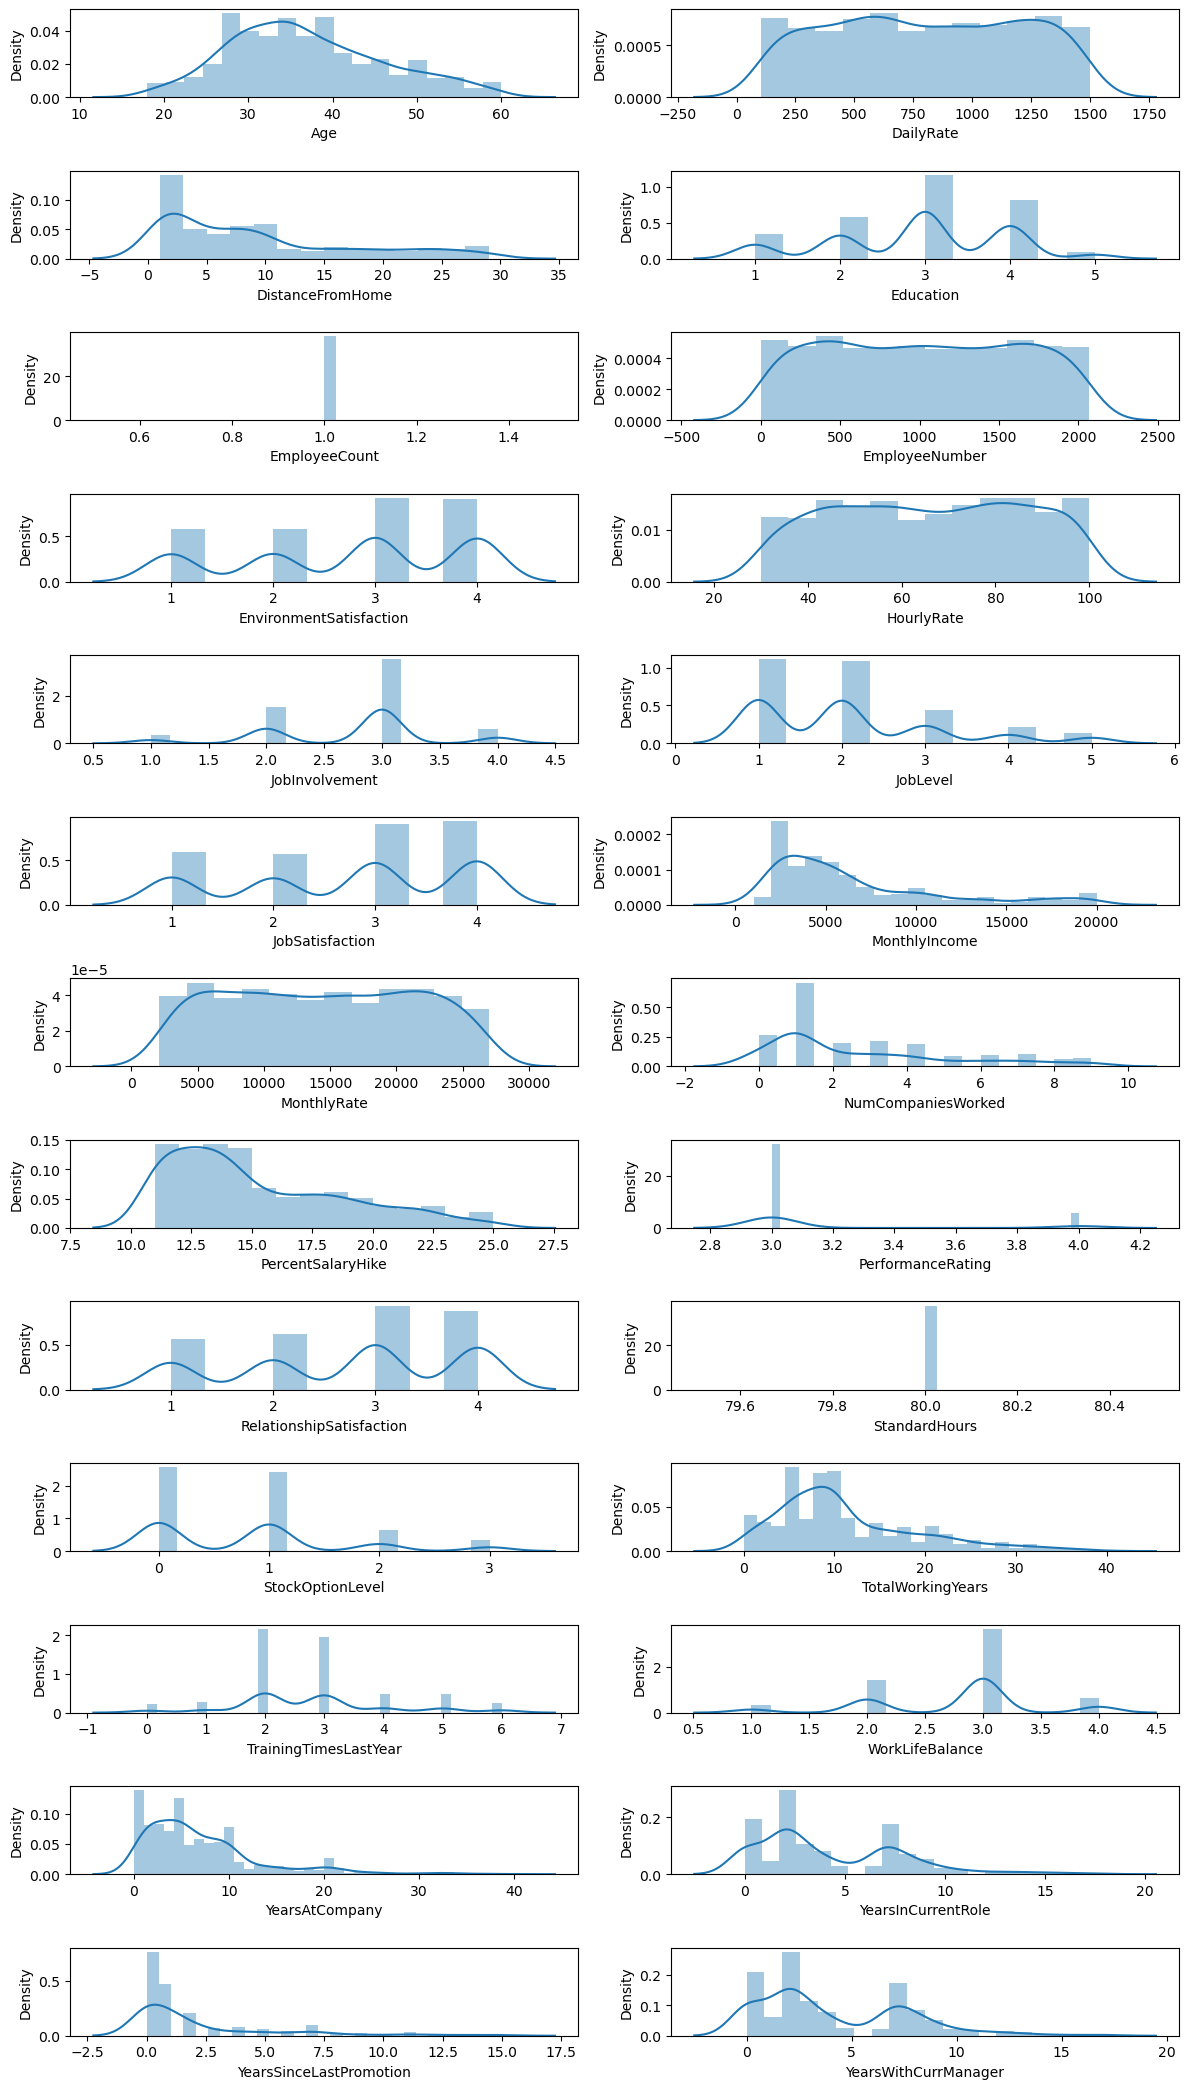

In [7]:
t=1
plt.figure(figsize=(12,21))
for i in data.select_dtypes(np.number):
    plt.subplot(13,2,t)
    sns.distplot(data[i])
    t+=1
    
plt.tight_layout()
plt.show()

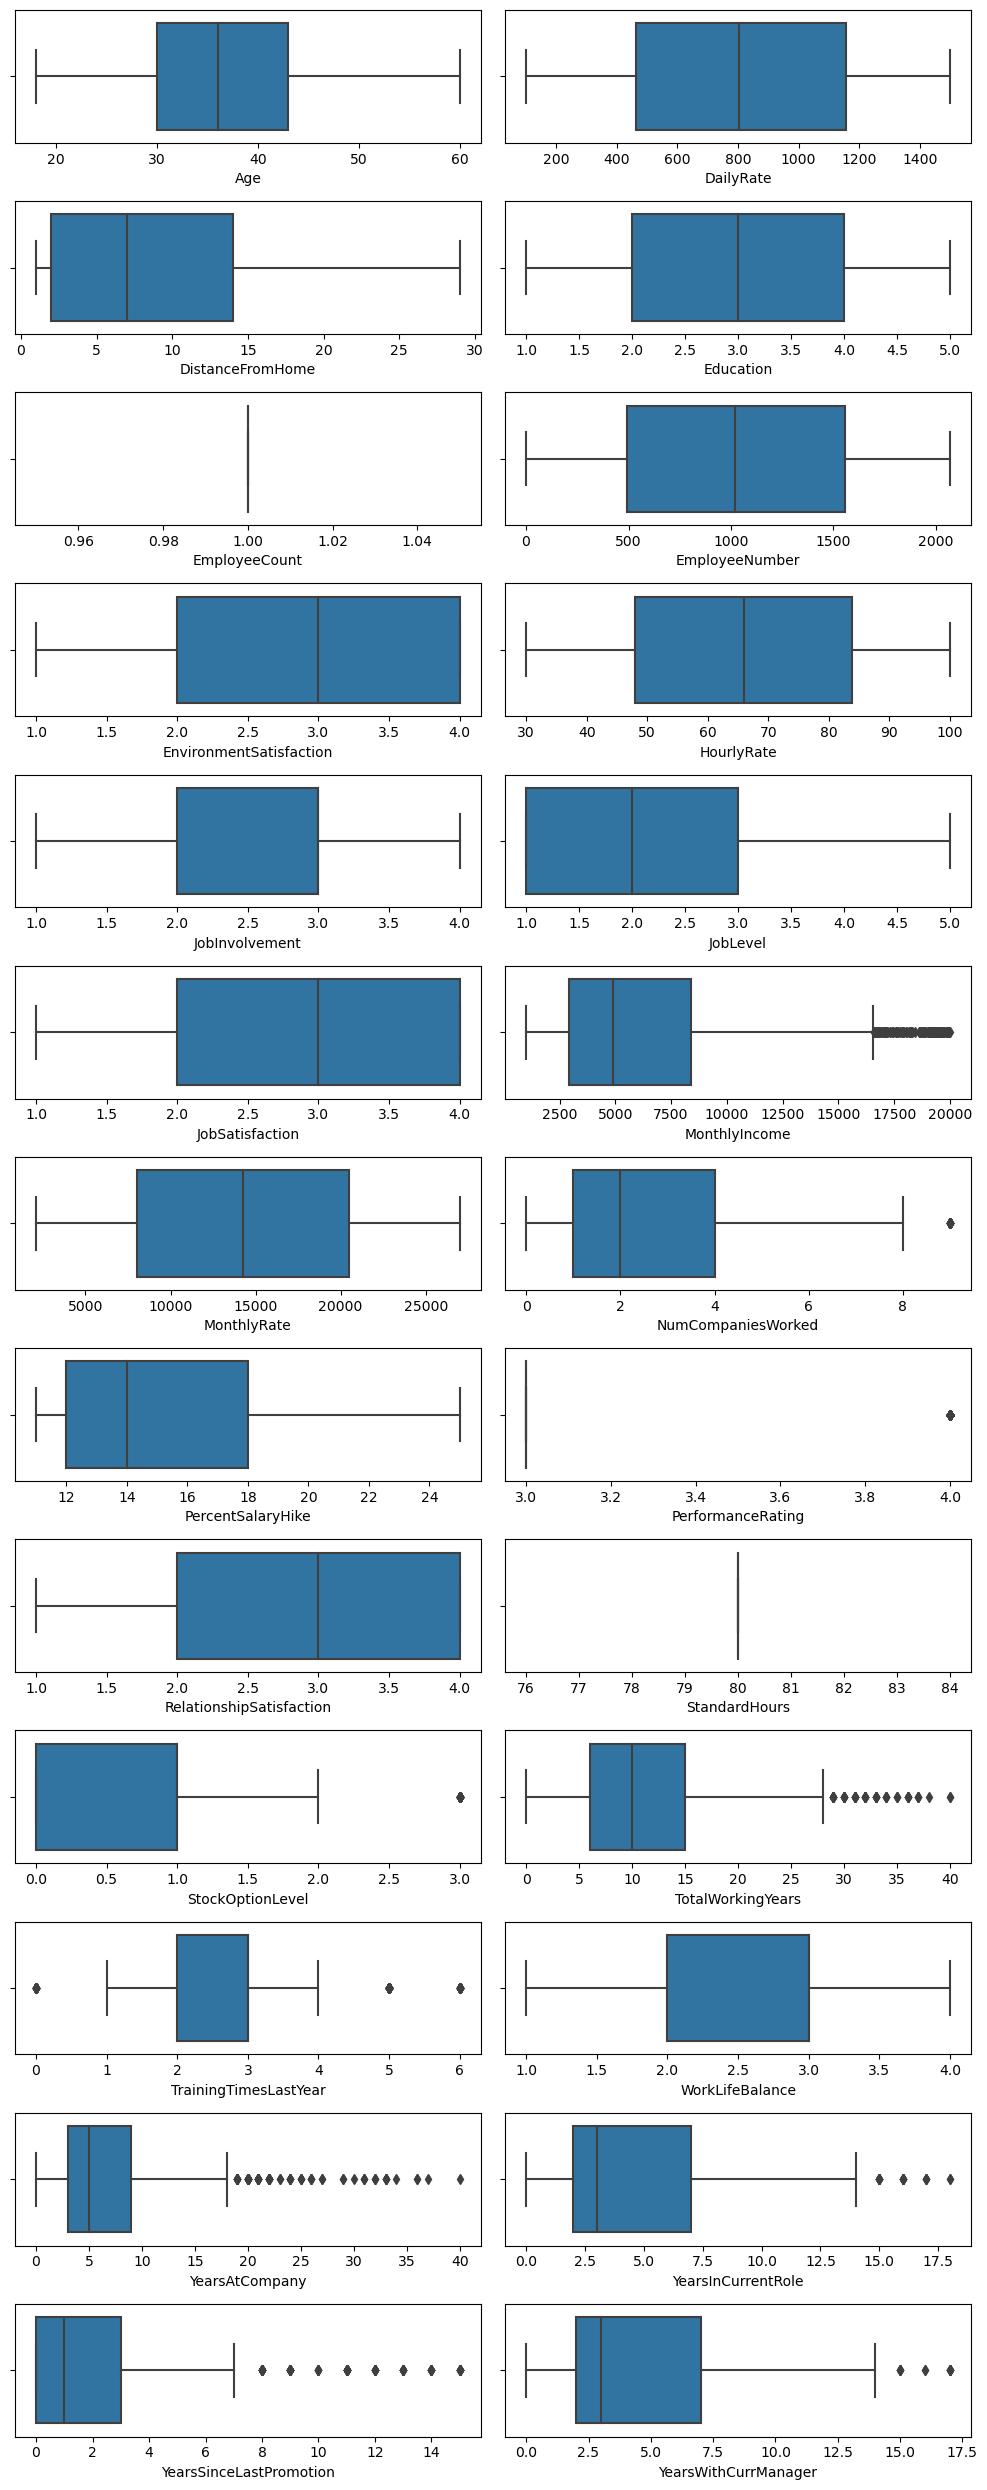

In [8]:
t=1
plt.figure(figsize=(10,25))
for i in data.select_dtypes(np.number):
    plt.subplot(13,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

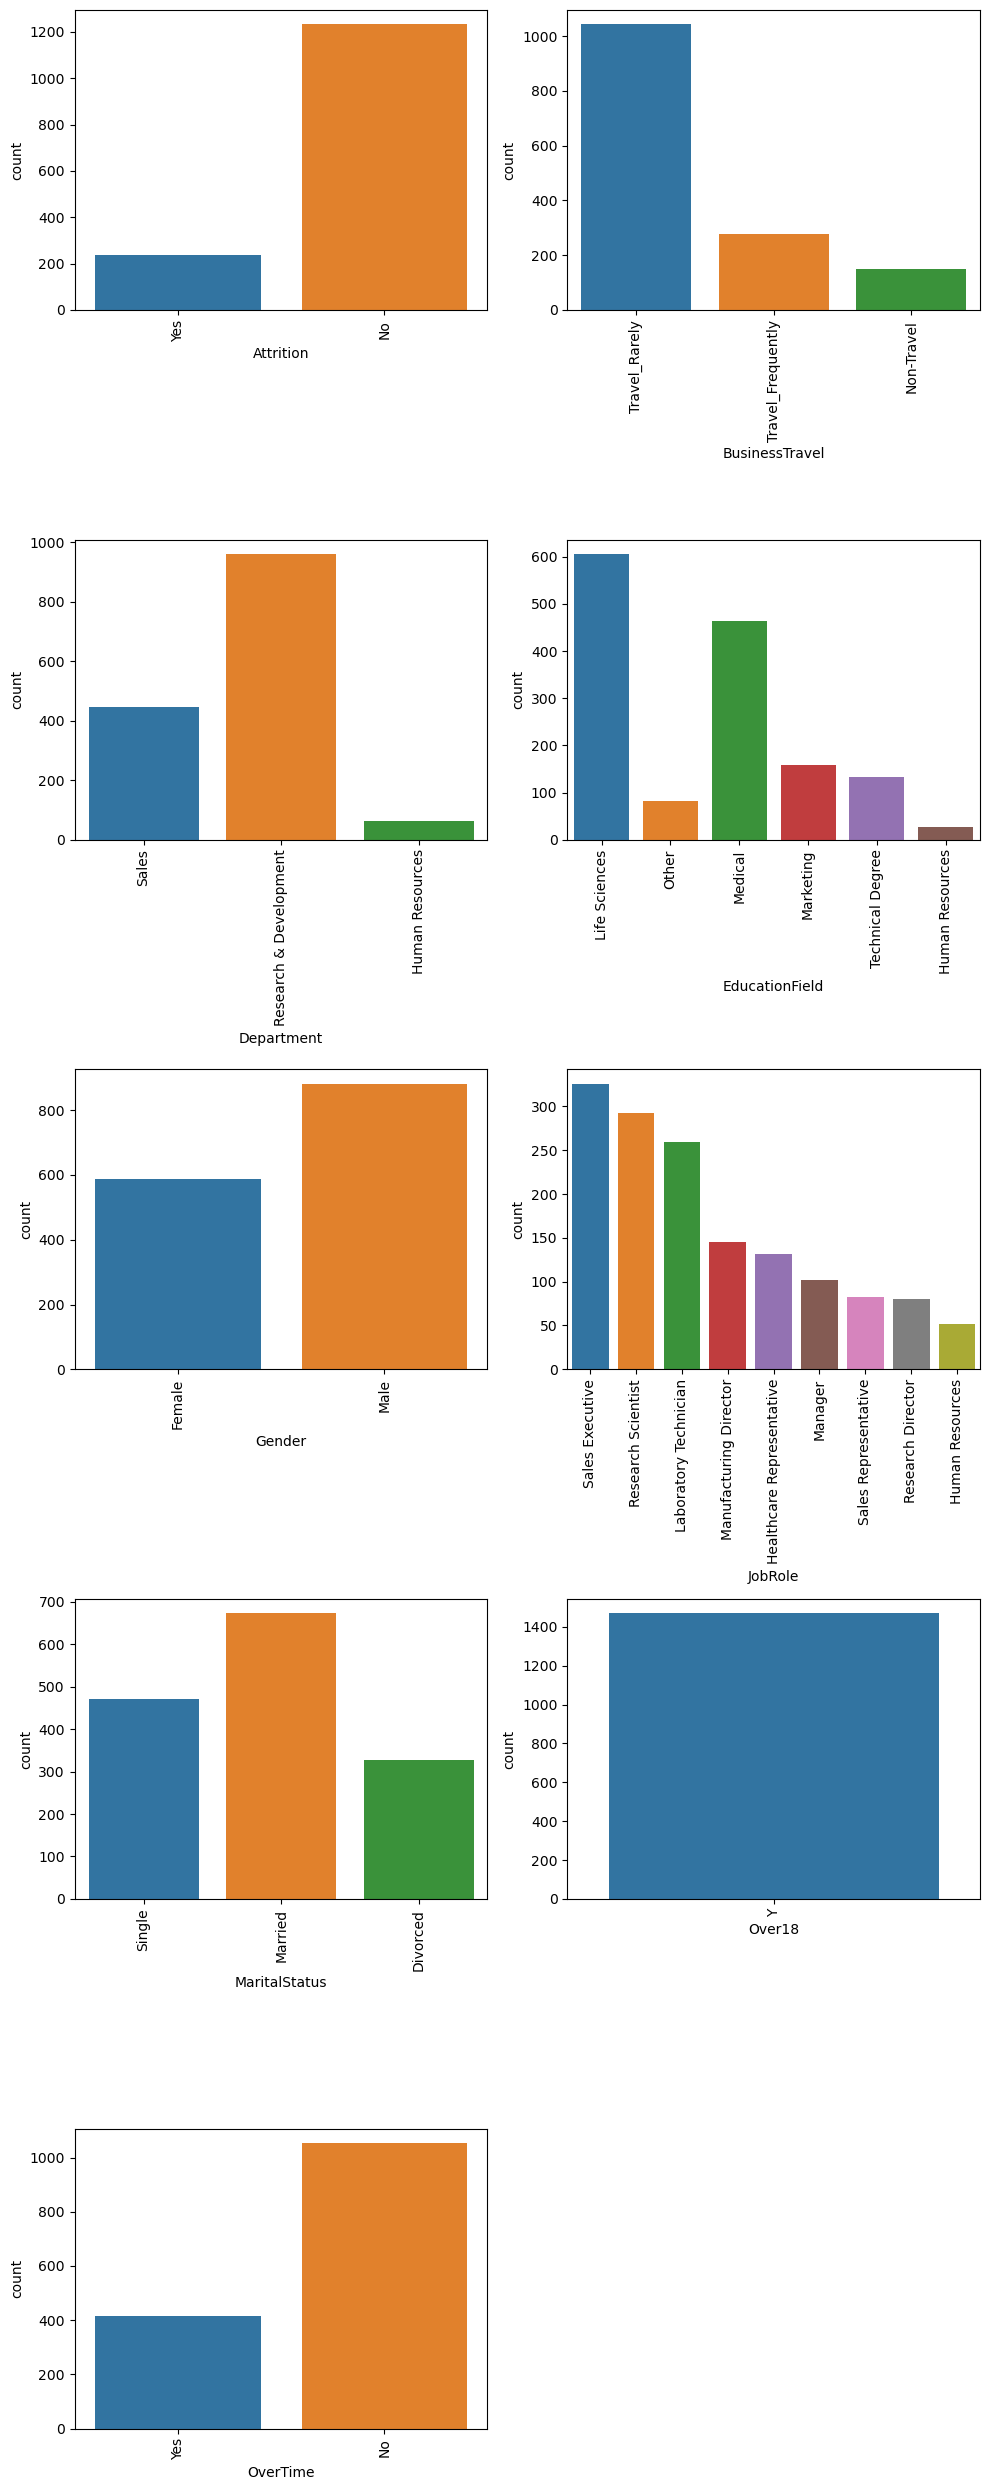

In [9]:
t=1
plt.figure(figsize=(10,25))
for i in data.select_dtypes(include='O'):
    plt.subplot(5,2,t)
    sns.countplot(x=data[i])
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

<Axes: >

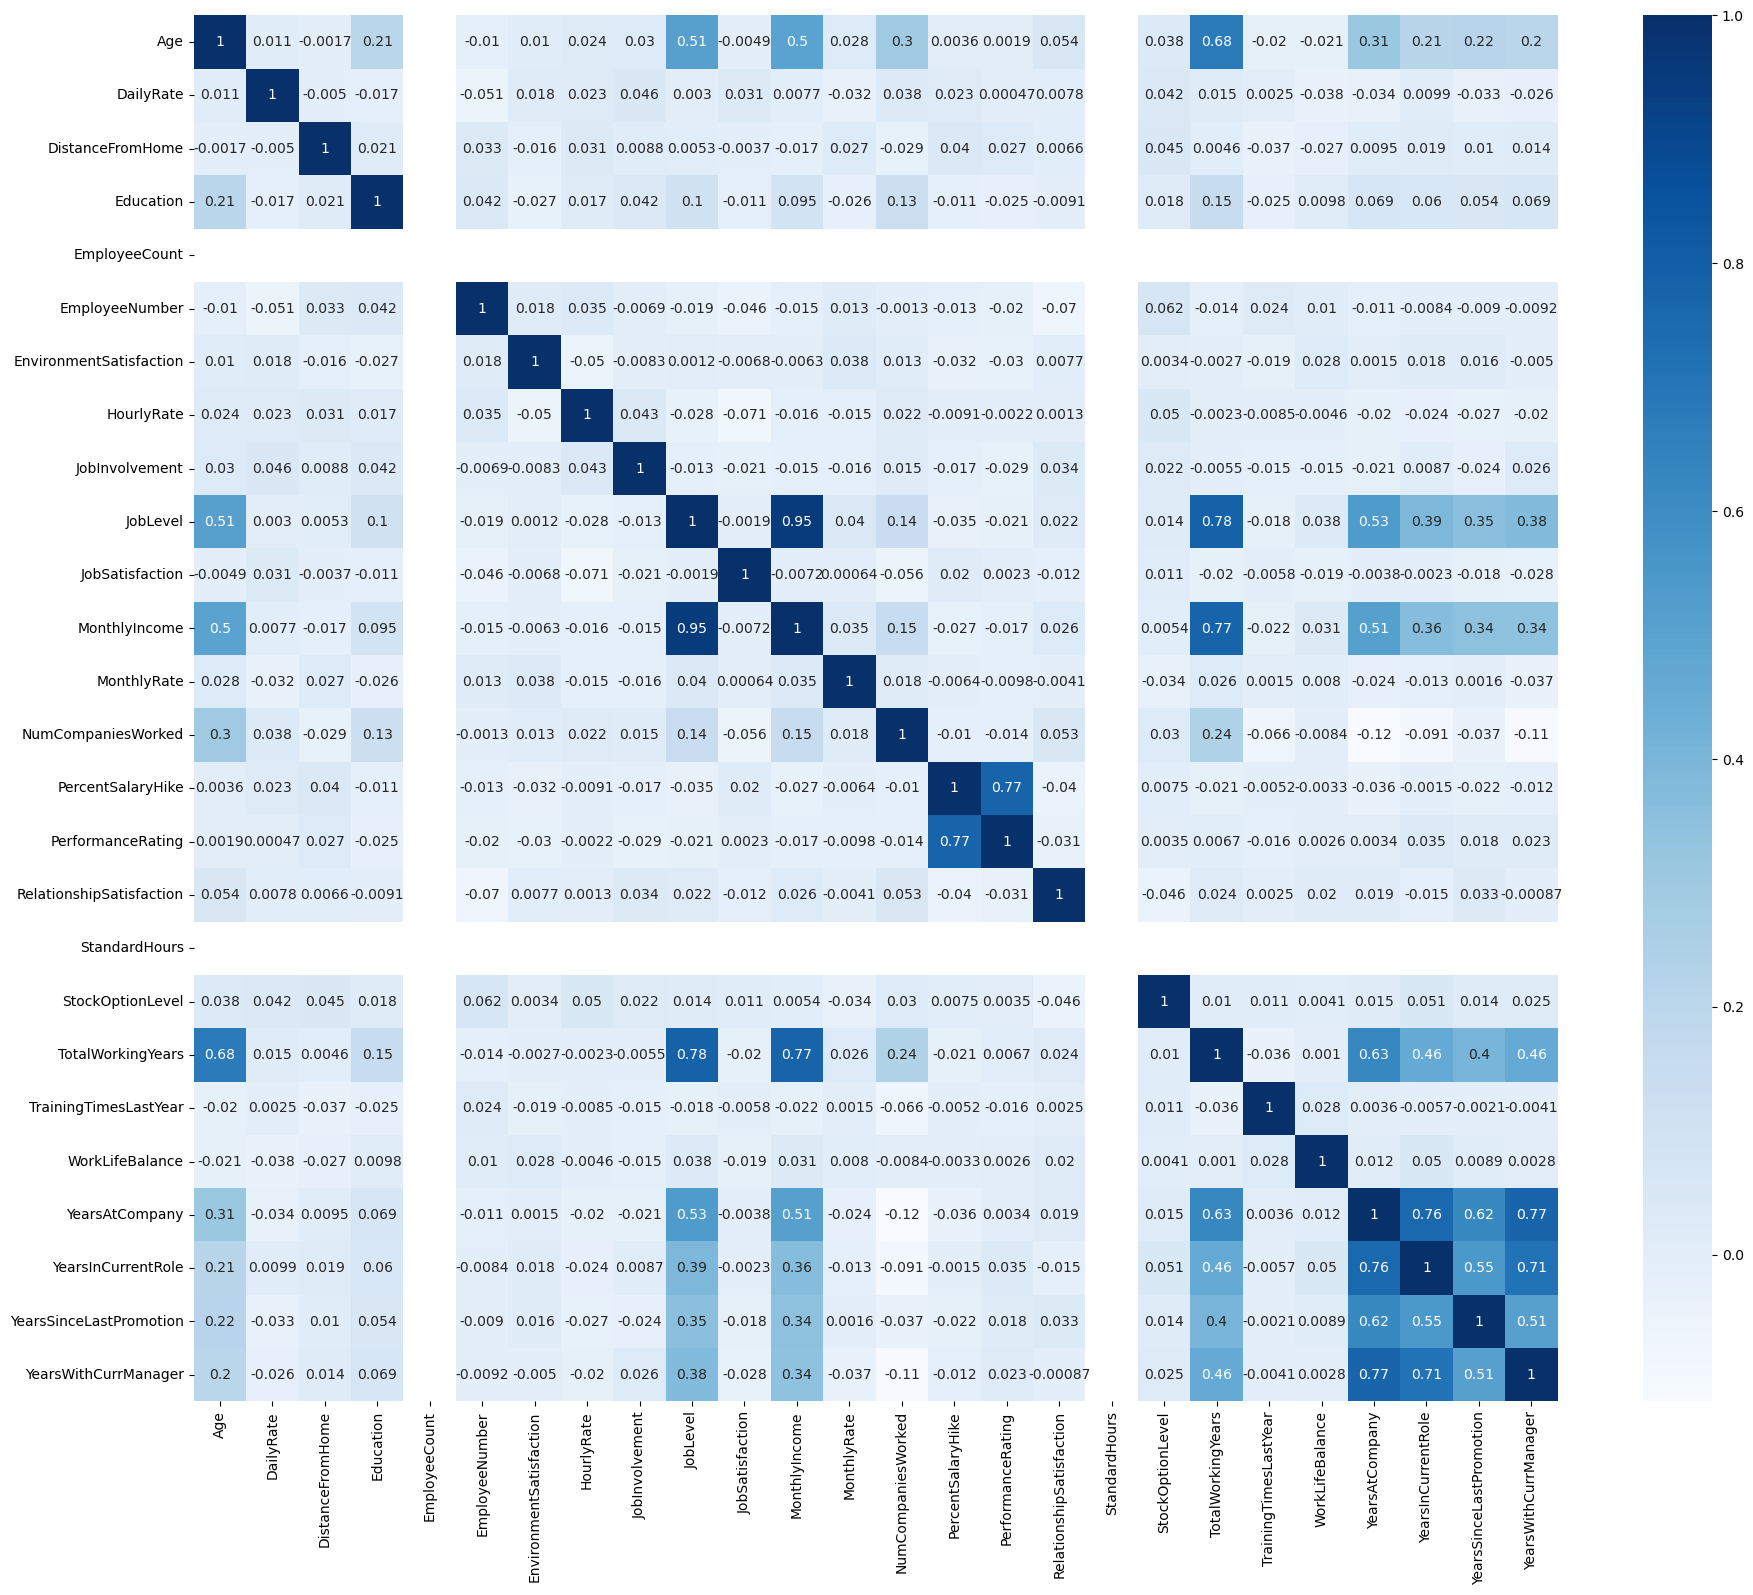

In [10]:
plt.figure(figsize=(22,18))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

### Missing Value Treatment...

In [11]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**as we can see that there is no missing values in the data....**

#### Outlier Treatment...

In [12]:
#data= 'MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
# 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

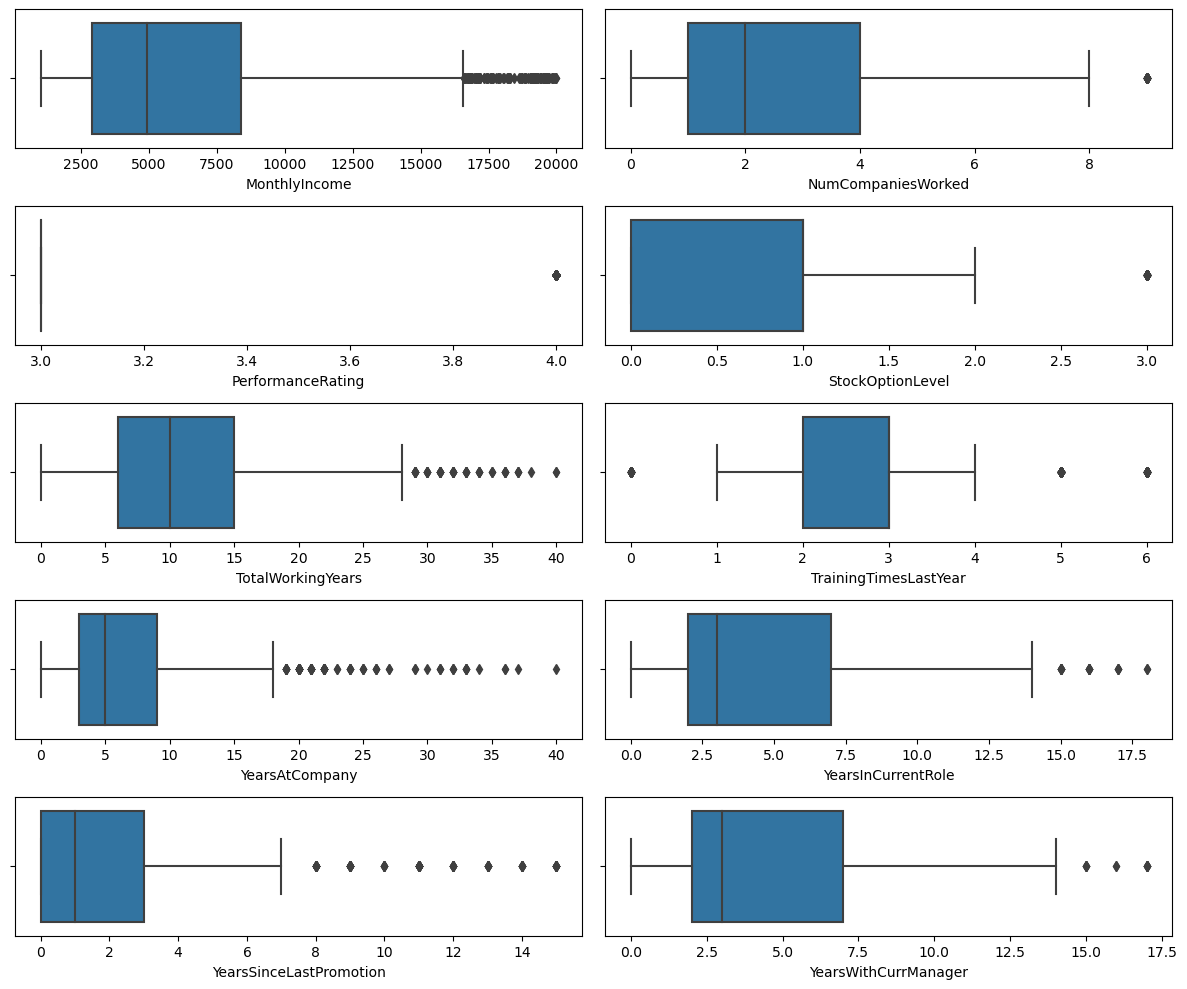

In [13]:
plt.figure(figsize=(12,10))
t=1
for i in data[['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]:
    plt.subplot(5,2,t)
    sns.boxplot(x= data[i])
    t+=1
    
plt.tight_layout()
plt.show()

In [14]:
data[data['MonthlyIncome']>17000].shape[0]

97

In [15]:
data[data['NumCompaniesWorked']>8].shape[0]

52

In [16]:
data[data['StockOptionLevel']==3].shape[0]

85

In [17]:
data[data['PerformanceRating']>3.5].shape[0]

226

In [18]:
data[data['TotalWorkingYears']>25].shape[0]

98

In [19]:
data[data['TrainingTimesLastYear']>4].shape[0]

184

In [20]:
data[data['TrainingTimesLastYear']<1].shape[0]

54

In [21]:
data[data['YearsAtCompany']>15].shape[0]

138

In [22]:
data[data['YearsInCurrentRole']>14].shape[0]

21

In [23]:
data[data['YearsSinceLastPromotion']>6].shape[0]

183

In [24]:
data[data['YearsWithCurrManager']>14].shape[0]

14

**Since the dataset is small and the information in outlier is important to consider so we can cap the outliers with the maximum value instead of dropping them**

In [25]:
data['MonthlyIncome']=np.where(data['MonthlyIncome']>17000, 17000,data['MonthlyIncome'])

In [26]:
data['NumCompaniesWorked']=np.where(data['NumCompaniesWorked']>8, 8,data['NumCompaniesWorked'])

In [27]:
data['PerformanceRating']=np.where(data['PerformanceRating']>3.5,3.5,data['PerformanceRating'])

In [28]:
data['TotalWorkingYears']=np.where(data['TotalWorkingYears']>25, 25,data['TotalWorkingYears'])

In [29]:
data['TrainingTimesLastYear']=np.where(data['TrainingTimesLastYear']>4, 4,data['TrainingTimesLastYear'])

In [30]:
data['TrainingTimesLastYear']=np.where(data['TrainingTimesLastYear']<1, 1,data['TrainingTimesLastYear'])

In [31]:
data['YearsAtCompany']=np.where(data['YearsAtCompany']>15, 15,data['YearsAtCompany'])

In [32]:
data['YearsInCurrentRole']=np.where(data['YearsInCurrentRole']>14, 14,data['YearsInCurrentRole'])

In [33]:
data['YearsSinceLastPromotion']=np.where(data['YearsSinceLastPromotion']>6, 6,data['YearsSinceLastPromotion'])

In [34]:
data['YearsWithCurrManager']=np.where(data['YearsWithCurrManager']>14, 14,data['YearsWithCurrManager'])

### Encoding

In [35]:
data.select_dtypes(include='O').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [36]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [37]:
label={'No':0, 'Yes':1}
data['Attrition']= data['Attrition'].map(label)

In [38]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [39]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [40]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [41]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [42]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [43]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [44]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [45]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
data2=data.copy()
label=LabelEncoder()
for x in data2.select_dtypes(include='object').columns:
    data2[x]=label.fit_transform(data2[x])
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3.0,1,80,0,8,1,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,3.5,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3.0,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3.0,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,8,0,0,12,3.0,4,80,1,6,3,3,2,2,2,2


In [48]:
data2.drop(columns=['Over18'], inplace=True)

In [49]:
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3.0,1,80,0,8,1,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,3.5,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3.0,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3.0,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,8,0,12,3.0,4,80,1,6,3,3,2,2,2,2


### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
X= data2.drop(columns=['Attrition'])
y= data2.Attrition

In [52]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 33), (294, 33), (1176,), (294,))

In [54]:
for i in ['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','StandardHours']:
    sc= StandardScaler()
    X_train[i]= sc.fit_transform(pd.DataFrame(X_train[i]))
    X_test[i]= sc.transform(pd.DataFrame(X_test[i]))

### Model Building

##### As our target variable that is attrition is imbalanced then we need to balance that using SMOTE...

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smote= SMOTE()
X_train_bal, y_train_bal= smote.fit_resample(X_train, y_train)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, roc_curve

In [62]:
def Validation(test, pred):
    print('Confusion Matrix \n', confusion_matrix(test, pred))
    print('Accuracy \n', accuracy_score(test, pred))
    print('Precision \n', precision_score(test, pred))
    print('Recall \n', recall_score(test, pred))
    print('Cohen Kappa \n', cohen_kappa_score(test, pred))
    print('Classification Report \n', classification_report(test, pred))

In [66]:
def roc_curv(test, pred):
    fpr, tpr, threshold= roc_curve(test, pred)
    print('AUC:', roc_auc_score(test, pred))
    plt.plot(fpr, tpr, color='red')
    plt.plot([0,1], [0,1], 'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')

In [67]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    y_pred = model.predict(X_test)
   
    Validation(y_test,y_pred)
    
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    roc_curv(y_test,y_pred_prob)

LogisticRegression()
Confusion Matrix 
 [[195  51]
 [ 23  25]]
Accuracy 
 0.7482993197278912
Precision 
 0.32894736842105265
Recall 
 0.5208333333333334
Cohen Kappa 
 0.2539094650205761
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       246
           1       0.33      0.52      0.40        48

    accuracy                           0.75       294
   macro avg       0.61      0.66      0.62       294
weighted avg       0.80      0.75      0.77       294

AUC: 0.7240853658536586


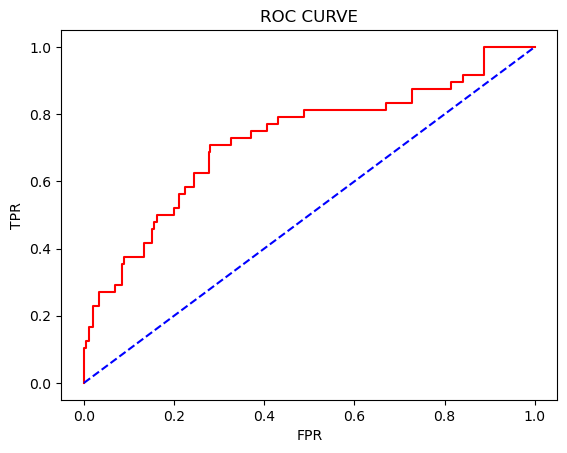

In [68]:
model_results(LogisticRegression(),X_train_bal, y_train_bal, X_test, y_test)

DecisionTreeClassifier()
Confusion Matrix 
 [[194  52]
 [ 26  22]]
Accuracy 
 0.7346938775510204
Precision 
 0.2972972972972973
Recall 
 0.4583333333333333
Cohen Kappa 
 0.20275344180225274
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       246
           1       0.30      0.46      0.36        48

    accuracy                           0.73       294
   macro avg       0.59      0.62      0.60       294
weighted avg       0.79      0.73      0.76       294

AUC: 0.6234756097560974


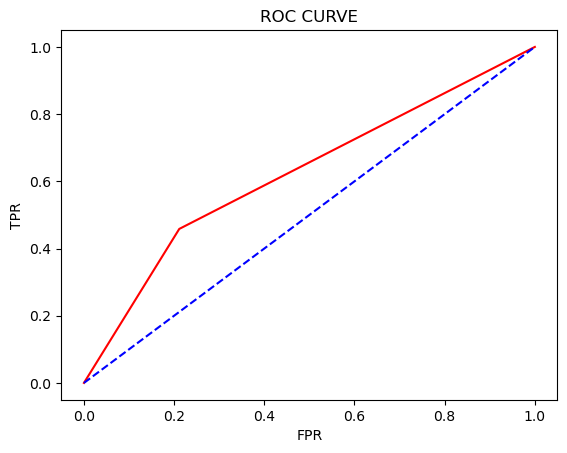

In [69]:
model_results(DecisionTreeClassifier(),X_train_bal, y_train_bal, X_test, y_test)

RandomForestClassifier()
Confusion Matrix 
 [[230  16]
 [ 34  14]]
Accuracy 
 0.8299319727891157
Precision 
 0.4666666666666667
Recall 
 0.2916666666666667
Cohen Kappa 
 0.2669060442848593
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       246
           1       0.47      0.29      0.36        48

    accuracy                           0.83       294
   macro avg       0.67      0.61      0.63       294
weighted avg       0.81      0.83      0.81       294

AUC: 0.739329268292683


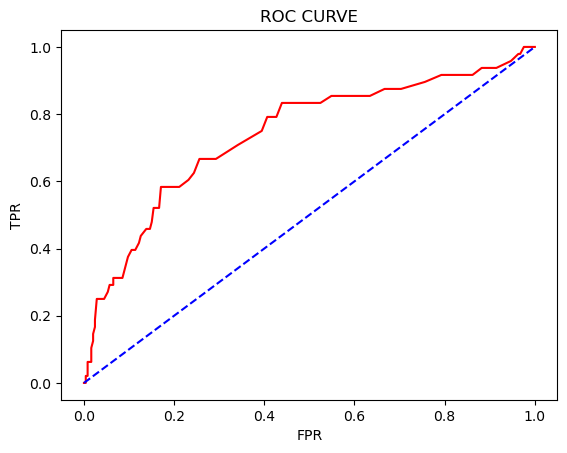

In [70]:
model_results(RandomForestClassifier(),X_train_bal, y_train_bal, X_test, y_test)

AdaBoostClassifier()
Confusion Matrix 
 [[217  29]
 [ 25  23]]
Accuracy 
 0.8163265306122449
Precision 
 0.4423076923076923
Recall 
 0.4791666666666667
Cohen Kappa 
 0.3495575221238938
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       246
           1       0.44      0.48      0.46        48

    accuracy                           0.82       294
   macro avg       0.67      0.68      0.67       294
weighted avg       0.82      0.82      0.82       294

AUC: 0.7634654471544715


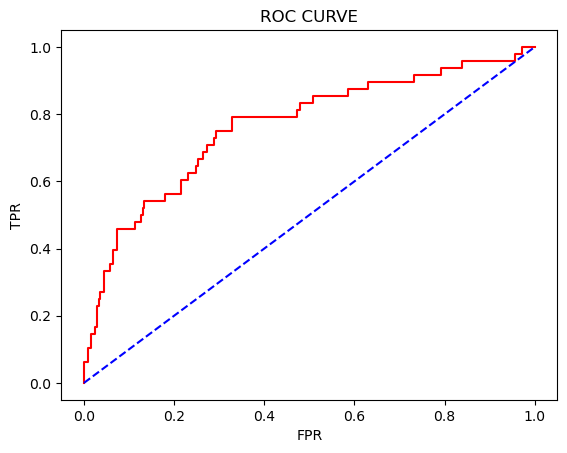

In [71]:
model_results(AdaBoostClassifier(),X_train_bal, y_train_bal, X_test, y_test)

GradientBoostingClassifier()
Confusion Matrix 
 [[224  22]
 [ 29  19]]
Accuracy 
 0.826530612244898
Precision 
 0.4634146341463415
Recall 
 0.3958333333333333
Cohen Kappa 
 0.32550607287449396
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       246
           1       0.46      0.40      0.43        48

    accuracy                           0.83       294
   macro avg       0.67      0.65      0.66       294
weighted avg       0.82      0.83      0.82       294

AUC: 0.7411077235772358


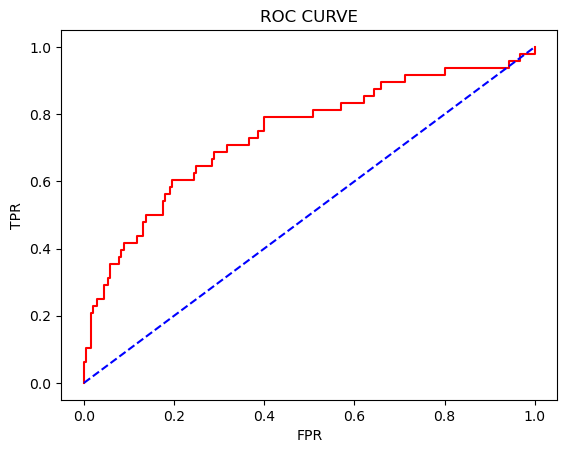

In [72]:
model_results(GradientBoostingClassifier(),X_train_bal, y_train_bal, X_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Confusion Matrix 
 [[232  14]
 [ 32  16]]
Accuracy 
 0.8435374149659864
Precision 
 0.5333333333333333
Recall 
 0.3333333333333333
Cohen Kappa 
 0.32555356074207054
Classification Report 
               precision    recall  f1-score   support

    

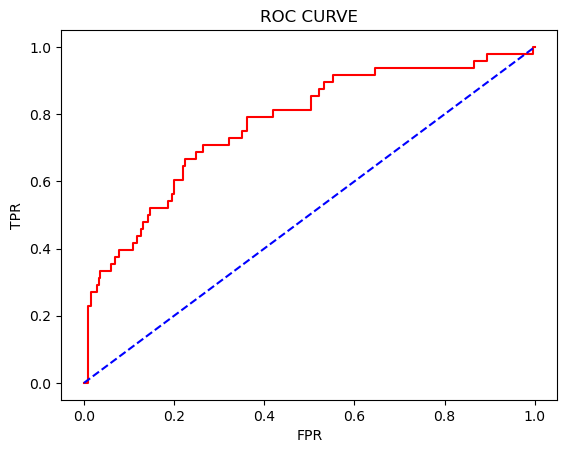

In [77]:
model_results(XGBClassifier(n_estimators= 100),X_train_bal, y_train_bal, X_test, y_test)

KNeighborsClassifier()
Confusion Matrix 
 [[157  89]
 [ 28  20]]
Accuracy 
 0.6020408163265306
Precision 
 0.1834862385321101
Recall 
 0.4166666666666667
Cohen Kappa 
 0.036308623298033194
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.64      0.73       246
           1       0.18      0.42      0.25        48

    accuracy                           0.60       294
   macro avg       0.52      0.53      0.49       294
weighted avg       0.74      0.60      0.65       294

AUC: 0.5481029810298104


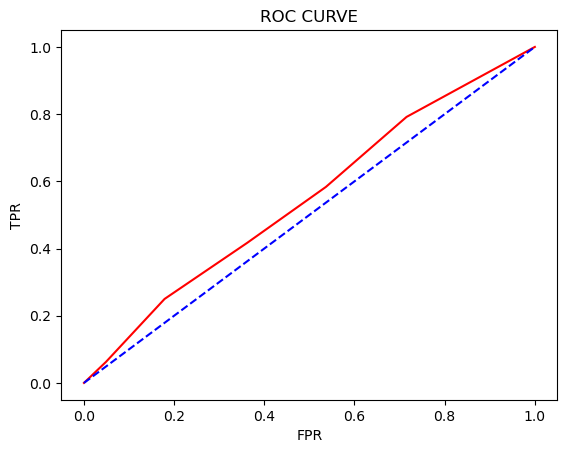

In [74]:
model_results(KNeighborsClassifier(),X_train_bal, y_train_bal, X_test, y_test)

GaussianNB()
Confusion Matrix 
 [[170  76]
 [ 16  32]]
Accuracy 
 0.6870748299319728
Precision 
 0.2962962962962963
Recall 
 0.6666666666666666
Cohen Kappa 
 0.23799864773495605
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.69      0.79       246
           1       0.30      0.67      0.41        48

    accuracy                           0.69       294
   macro avg       0.61      0.68      0.60       294
weighted avg       0.81      0.69      0.73       294

AUC: 0.7384823848238482


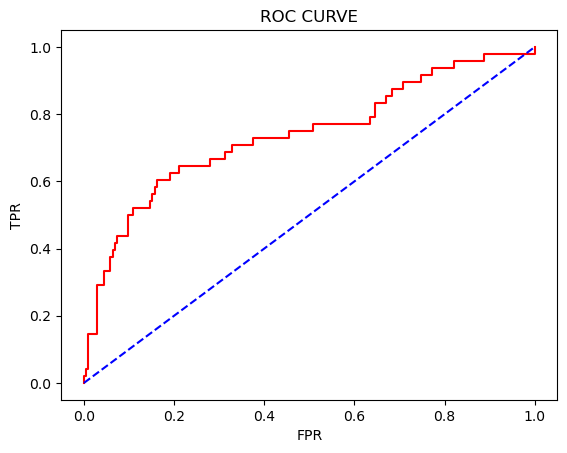

In [75]:
model_results(GaussianNB(),X_train_bal, y_train_bal, X_test, y_test)

#### As we can see that the XGBoost algorithm will give the best accuracy hence we can go with this model.